In [ ]:
import time
t_start = time.time()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
"""
Original link: https://www.kaggle.com/c/decoding-the-human-brain/data
"""
path = "Swarm_Behaviour.csv"
total_df = pd.read_csv(path)


In [3]:
N_COLS = len(total_df.columns)
N_FILES = 6

In [12]:
for i in range(N_FILES):
    slice_df = total_df[total_df.columns[i * N_COLS // N_FILES: (i+1) * N_COLS // N_FILES]]
    slice_df.to_parquet(f'slice{i}.parquet.gzip')

In [14]:
dfs = []
for i in range(N_FILES):
    slice_df = pd.read_parquet(f'slice{i}.parquet.gzip')
    dfs.append(slice_df)

original_df = pd.concat(dfs, axis=1)

In [18]:
original_df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [15]:
df = original_df.reset_index().rename(columns={"index": "id"})
COLS = ["id", 'x', 'y', 'xVel', 'yVel', 'xA', 'yA', 'xS', 'yS', 'xC', 'yC', 'nAC', 'nS']
TS_LENGTH = 200
INT_DIGITS = 3

In [16]:
target = df[["id", "Swarm_Behaviour"]].astype(int)
df = df.drop("Swarm_Behaviour", axis=1)

<Axes: >

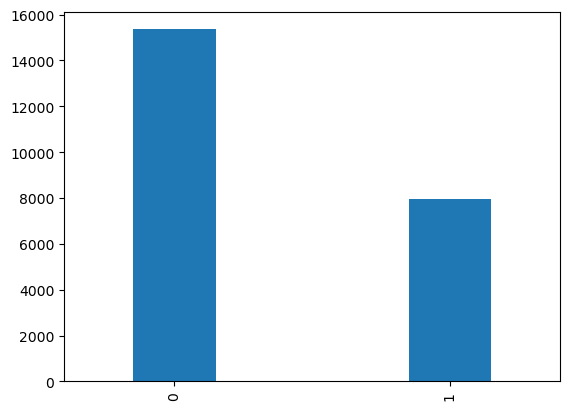

In [17]:
target.Swarm_Behaviour.value_counts().plot.bar(width=0.3)

In [ ]:
target.head(5)

In [ ]:
df.head(2)

In [ ]:
reformatted_cols = ["id"] + [f"{COLS[i]}_{j:0{INT_DIGITS}}" for j in range(1, 201) for i in range(1, len(COLS))]
df.columns = reformatted_cols

In [ ]:
df.head(2)

In [ ]:
melted = df.melt(id_vars="id")


In [ ]:
variable_raw = melted.variable.copy()
melted["variable"] = variable_raw.apply(lambda string: string.split("_")[0])
melted["time"] = variable_raw.apply(lambda string: string.split("_")[1]).astype(int)

In [ ]:
variables = melted.variable.unique()
means = melted.groupby(["id", "variable"]).value.mean().unstack()
means.columns = [f"{col}_mean" for col in variables]

stds = melted.groupby(["id", "variable"]).value.std().unstack()
stds.columns = [f"{col}_std" for col in variables]


In [ ]:
features = pd.concat([means, stds], axis=1)

In [ ]:
features

In [ ]:
features[target.Swarm_Behaviour == 1].mean().plot.bar()

In [ ]:
features[target.Swarm_Behaviour == 0].mean().plot.bar()

In [ ]:
sns.heatmap(features.corr())

In [ ]:
t_end = time.time()
t_total = round(t_end - t_start, 3)
mins = int(t_total//60)
seconds = int(t_total%60)

In [ ]:
print(f"Time taken: {mins}m{seconds}s")